# Data exploring

In [207]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import svm
import matplotlib.pyplot as plt


In [208]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [209]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [210]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [212]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [213]:
# There is zero values in coordinations

In [214]:
train.shape

(43152, 11)

In [215]:
train = train.drop(columns=['Id'])
test = test.drop(columns=['Id'])

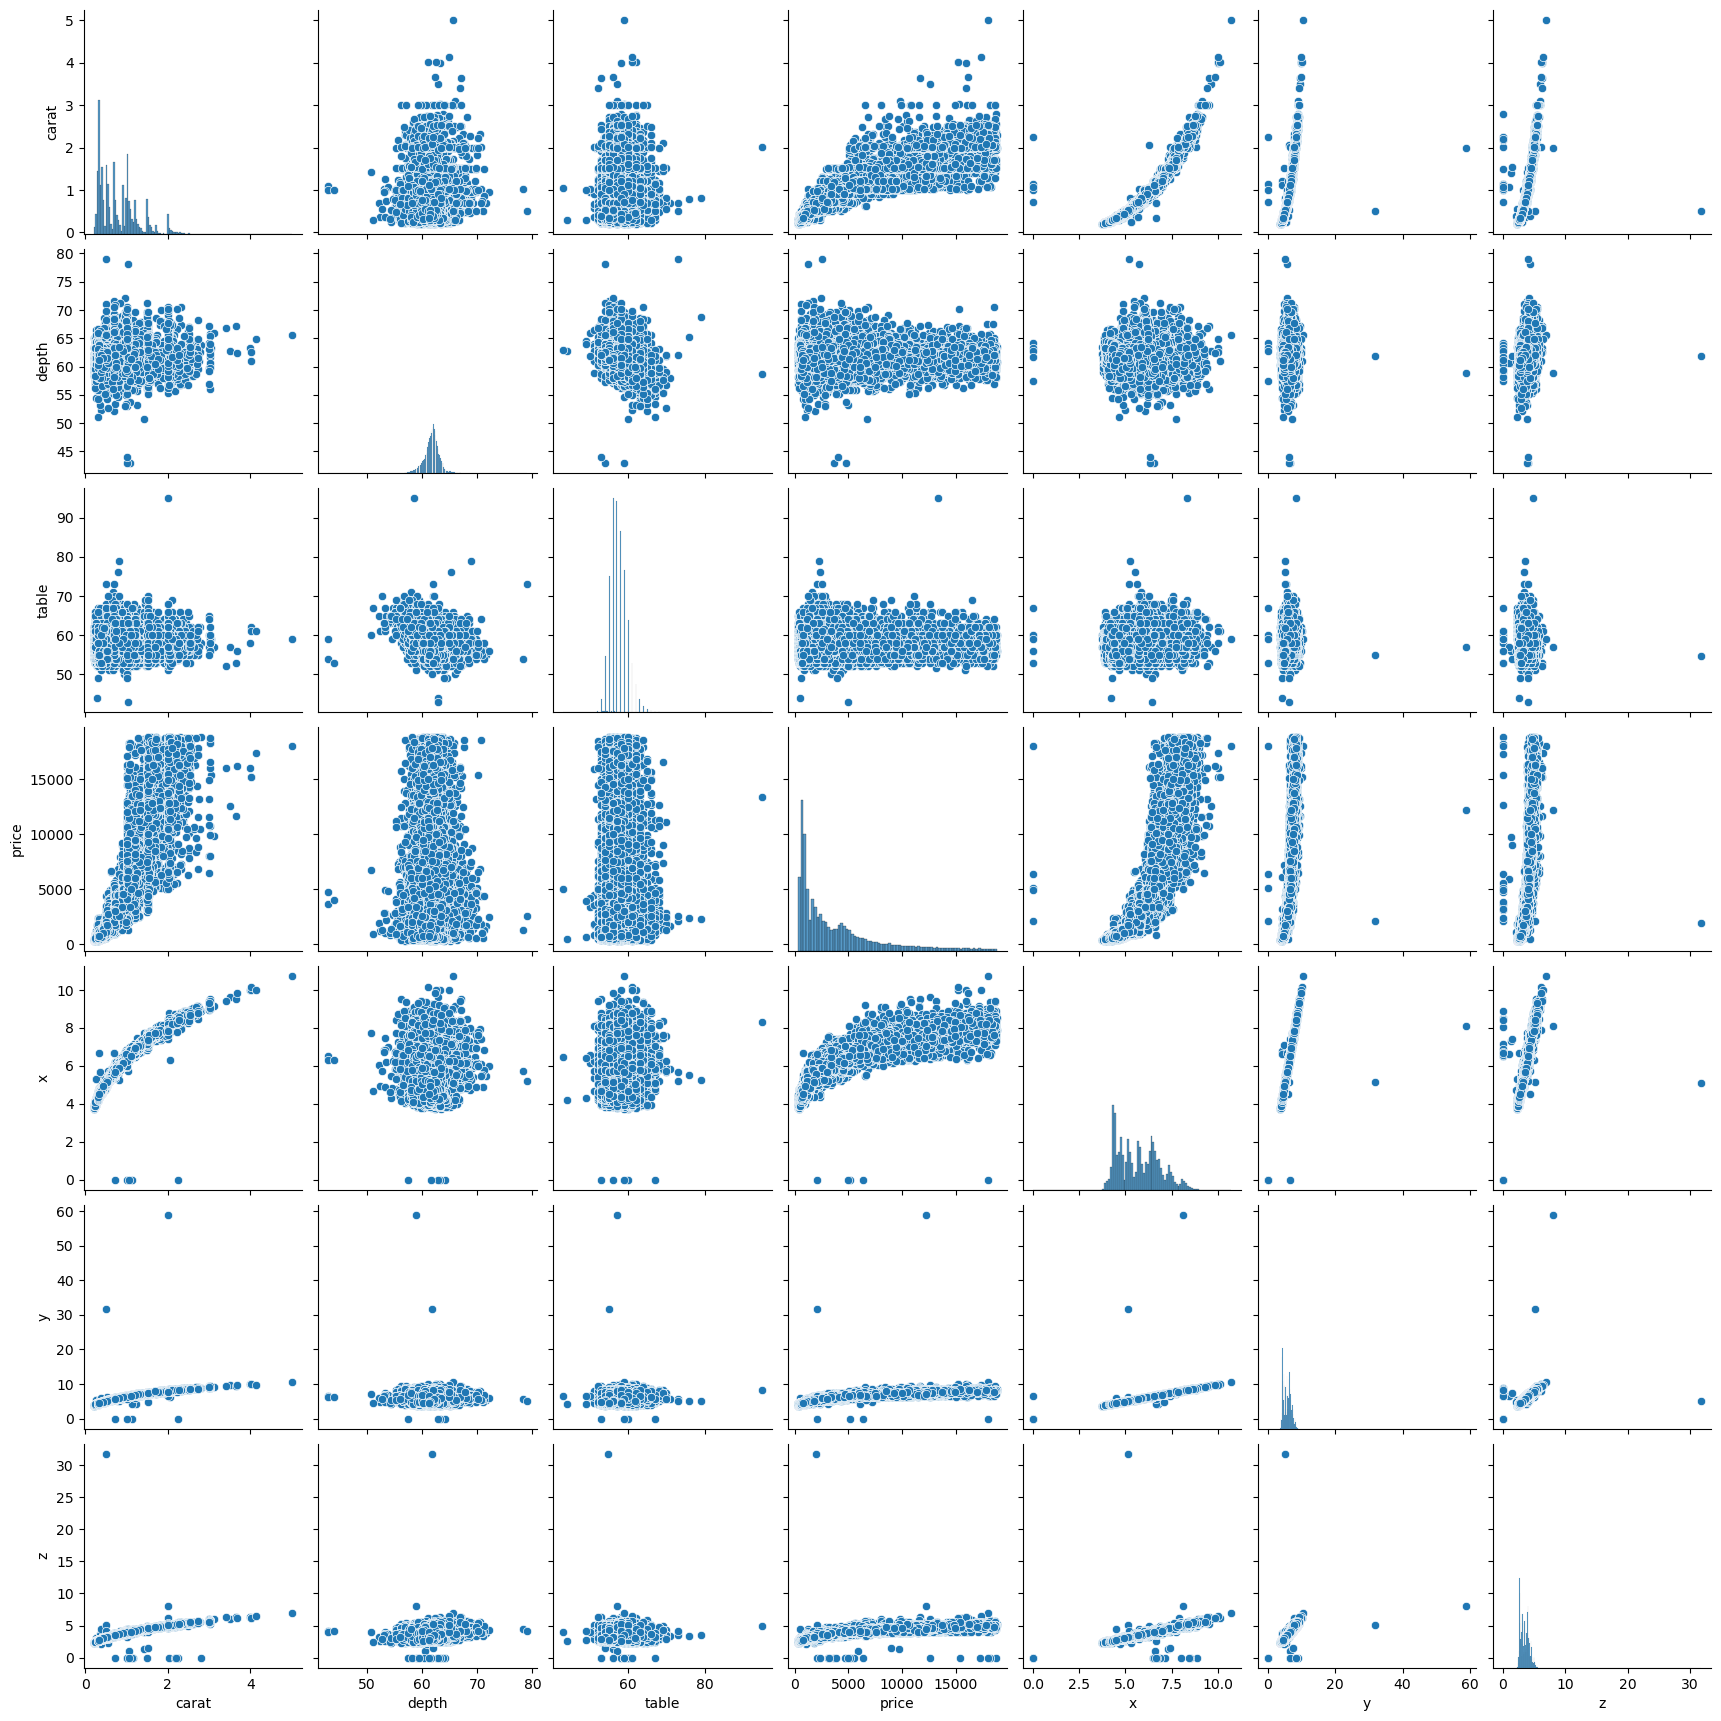

In [216]:
sns.pairplot(train);

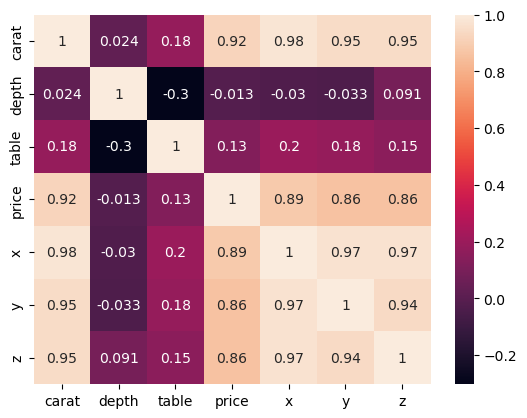

In [217]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True);

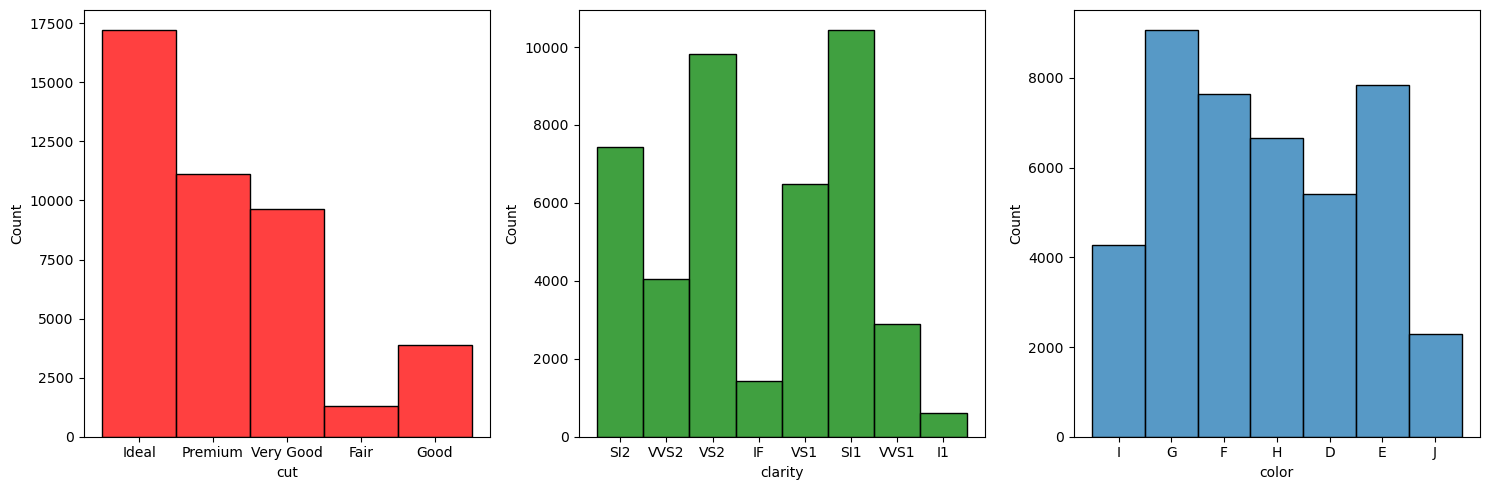

In [218]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.histplot(train['cut'], ax=ax[0], color='r')
sns.histplot(train['clarity'], ax=ax[1], color='g')
sns.histplot(train['color'], ax=ax[2])
fig.tight_layout()

<Axes: >

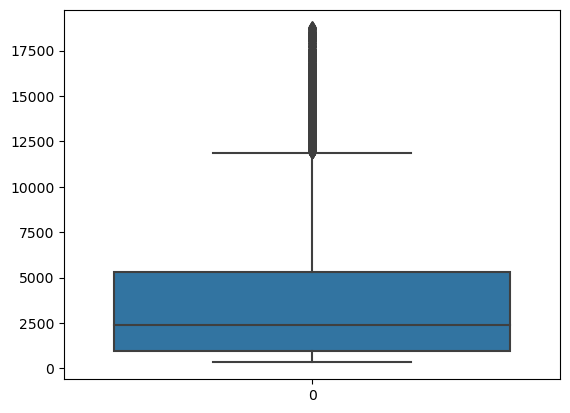

In [219]:
sns.boxplot(train['price'])

# Preprocessing

Went for normalizing here since outliers here r crucial for models performance after testing

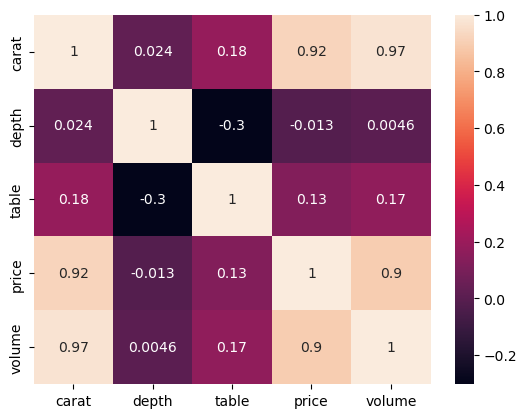

In [221]:
# Using x, y, z as 1 feature: Volume
train['volume'] = train['x']*train['y']*train['z']
train = train.drop(columns=['x','y','z'])
test['volume'] = test['x']*test['y']*test['z']
test = test.drop(columns=['x','y','z'])
test_corr = train.corr(numeric_only=True)
sns.heatmap(test_corr, annot=True);


In [222]:
# replacing 0 values in the data
train['volume']=train['volume'].replace(0, train['volume'].median())

In [223]:
train.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200


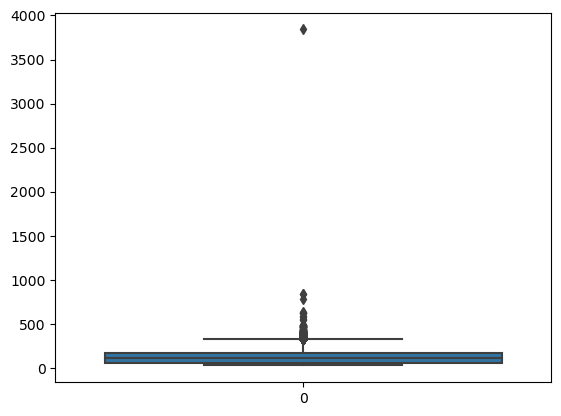

In [224]:
sns.boxplot(train['volume']);

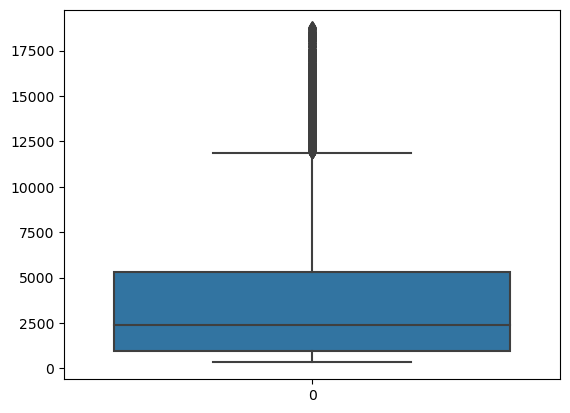

In [225]:
sns.boxplot(train['price']);

In [226]:
y_train = train['price']
X_train = train.drop(columns=['price'])

# Building Pipeline

In [227]:
# Making pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
import numpy as np

def log_transform(X):
    return np.log(X+1)
num_attribs = list(X_train.columns.drop(['cut', 'clarity', 'color']))
cat_attribs = list(X_train[['cut', 'clarity', 'color']].columns)
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", cat_pipeline, cat_attribs)])


In [228]:
X_train.head()

,carat,cut,color,clarity,depth,table,volume
0,1.06,Ideal,I,SI2,61.8,57.0,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,115.315200


In [229]:
train_prepared = full_pipeline.fit_transform(X_train)

In [230]:
train.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200


## Linear Model

In [231]:
# Building Linear Regression Model
reg_model = LinearRegression().fit(train_prepared, y_train)
test_l = full_pipeline.fit_transform(test)
predictions = reg_model.predict(test_l)

In [232]:
reg_model.score(train_prepared, y_train)

0.8810855143968829

In [233]:
y_train.shape

(43152,)

In [234]:
prediction_ready = pd.DataFrame(predictions, columns=['price'])

In [235]:
train2 = pd.read_csv('test.csv')
idc = pd.DataFrame()
idc['id'] = train2['Id']
prediction_ready['Id'] = idc['id']

In [236]:
prediction_ready.head()

,price,Id
0,1048.212685,1
1,3844.690209,2
2,518.045110,3
3,4247.321493,4
4,1327.644446,5


In [237]:
# Setting ID as the index to meet the requirments of submission in kaggle competition
prediction_ready.set_index('Id', drop=True, inplace=True)

In [238]:
prediction_ready.head()

,price
Id,
1,1048.212685
2,3844.690209
3,518.045110
4,4247.321493
5,1327.644446


In [239]:
# Saving predictions as a CSV file
prediction_ready.to_csv('predictions2.csv')

In [240]:
test.head()

,carat,cut,color,clarity,depth,table,volume
0,0.34,Ideal,G,VVS2,61.1,57.0,55.686400
1,0.71,Premium,E,VS2,62.7,58.0,116.719456
2,0.44,Very Good,I,VS1,62.8,56.0,71.889720
3,0.81,Premium,E,SI2,60.1,59.0,134.037855
4,0.40,Ideal,G,VVS1,61.2,56.0,66.435840


In [241]:
y_train.head()

0     4270
1    15164
2      828
3     1577
4     2596
Name: price, dtype: int64

## XGB Model

In [242]:
# Building XGBregressor model and fine tuning it.


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

xgb_model = GridSearchCV(xgb_model, param_grid, cv=3).fit(train_prepared, y_train)
#cv_results = cross_validate(xgb_model, train_prepared, y_train, return_estimator=True, return_train_score=True ,cv=3, scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error')

In [243]:
xgb_model = xgb_model.best_estimator_.fit(train_prepared, y_train)
test_s = full_pipeline.fit_transform(test)
predictions = xgb_model.predict(test_s)

In [244]:
xgb_prediction_ready = pd.DataFrame(predictions, columns=['price'])


In [245]:
xgb_prediction_ready['Id'] = idc['id']

In [246]:
xgb_predictions_ready = xgb_prediction_ready.set_index('Id')

In [247]:
xgb_prediction_ready.head()

,price,Id
0,829.260742,1
1,2938.346436,2
2,843.617676,3
3,2819.866455,4
4,1111.761597,5


In [248]:
xgb_prediction_ready.set_index('Id', drop=True, inplace=True)

In [249]:
xgb_prediction_ready.to_csv('xgb_predictions.csv')